In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.shape

(50000, 2)

In [6]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
df.duplicated().sum()

np.int64(418)

In [8]:
df=df.drop_duplicates()

In [9]:
df=df.iloc[:10000]

# Data Cleaning

1. Lower Case

In [10]:
df['review']=df['review'].str.lower()

In [11]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
10012,i was pleasantly surprised to find that how to...,positive
10013,this is a very moving film that takes a new tw...,positive
10014,apart from the beautiful imagery thanks to new...,negative
10015,this is a perfect series for family viewing. w...,positive


2. Removing Leading And Trailing Spaces

In [12]:
df['review']=df['review'].str.strip()

3. Removing HTML Tags

In [13]:
# M-1
import re
def remove_html(data):
    data=re.sub(r'<.*?>','',data)
    return data

df['review'].apply(remove_html)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing. w...
10016    a really very bad movie, with a very few good ...
Name: review, Length: 10000, dtype: object

In [14]:
# M-2
df['review']=df['review'].str.replace(r'<.*?>','',regex=True)

Removing URLS

In [15]:
# M-1
def remove_URL(data2):
    data2=re.sub(r"https?://\S+|www\.\S+",'',data2)
    return data2

df['review'].apply(remove_URL)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing. w...
10016    a really very bad movie, with a very few good ...
Name: review, Length: 10000, dtype: object

In [16]:
# Code to check if a review contains url or not
df[df['review'].str.contains(r"https?://\S+|www\.\S+",regex=True)].iloc[3].values

array(['i really think i should make my case and have every(horror and or cult)movie-buff go and see this movie...i did!it-is-excellent: very atmospheric and unsettling and scary...incridible how they could make such a gem of a film with the very low(read-"no"!)-budget they had....synopsis taken from website: "one morning, an old man wanders out into the woods in search of his runaway cat. he finds instead a child without parents and a murder with no corpse..."on this website(imdb) there is no trailer, but i will leave a link here to the site of the movie itself where there is a trailer which is quite unsettling so please go and check it out...www.softfordigging.com',
       'positive'], dtype=object)

In [17]:
df['review']=df['review'].str.replace(r"https?://\S+|www\.\S+",'')

In [18]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
10012,i was pleasantly surprised to find that how to...,positive
10013,this is a very moving film that takes a new tw...,positive
10014,apart from the beautiful imagery thanks to new...,negative
10015,this is a perfect series for family viewing. w...,positive


In [19]:
df[df['review'].str.contains("you'll")]

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
167,this is just one more of those hideous films t...,negative
172,the elegant documentary -don't watch this movi...,positive
178,an unforgettable masterpiece from the creator ...,positive
185,i'm sure deep in the recesses of jack blacks m...,negative
...,...,...
9908,"this is one of my favorite ""capra-esque"" comed...",positive
9968,i saw this film at its premier at sundance 09....,negative
9970,towards the end of this thriller ally sheedy's...,negative
9985,soylent green i found to be an excellent movie...,positive


Exanding Abbrivations

In [20]:
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    data = re.sub(r"who'll", "who will", data)
    
    return data

In [21]:
df['review']=df['review'].apply(remove_abb)

In [22]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
10012,i was pleasantly surprised to find that how to...,positive
10013,this is a very moving film that takes a new tw...,positive
10014,apart from the beautiful imagery thanks to new...,negative
10015,this is a perfect series for family viewing. w...,positive


Spelling Checking

In [23]:
from textblob import TextBlob
def spelling_correction(text):
    return TextBlob(text).correct().string

In [24]:
# df['review']=df['review'].apply(spelling_correction)

# do it latter on

Removing Punctuation Marks

In [25]:
import string

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text=text.replace(i,'')
    return text

In [28]:
df['review']=df['review'].apply(remove_punctuation)

Removing Special Character

In [29]:
df['review'].str.replace('[^\w\s]','')

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\MP2NJ\AppData\Local\Temp\ipykernel_21156\2659452047.py:1: SyntaxWarning: invalid escape sequence '\w'
  df['review'].str.replace('[^\w\s]','')


0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter matteis love in the time of money is a ...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing we...
10016    a really very bad movie with a very few good m...
Name: review, Length: 10000, dtype: object

# Data Pre-Processing

Tokenization

In [30]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter matteis love in the time of money is a ...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing we...
10016    a really very bad movie with a very few good m...
Name: review, Length: 10000, dtype: object

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MP2NJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
from nltk.tokenize import word_tokenize
df['Tokenize_Word']=df['review'].apply(word_tokenize)

In [33]:
df.head()

,review,sentiment,Tokenize_Word
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


Stopword Removal (is.am, the,etc)

In [34]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
def remove_stopwrds(text):
    L=[]
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)
    return L

In [36]:
df['Tokenize_Word']=df['Tokenize_Word'].apply(remove_stopwrds)

In [37]:
df.head()

,review,sentiment,Tokenize_Word
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there is a family where a little boy...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,..."


In [38]:
df['review']=df['Tokenize_Word'].apply(lambda x:" ".join(x))

# EDA & Feature Engineering

Distribution of text length / word count

text length

In [39]:
df['review_length']=df['review'].str.len()

In [40]:
df.head()

,review,sentiment,Tokenize_Word,review_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1130
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863


word length

In [41]:
df['Tokenize_word_len']=df['Tokenize_Word'].apply(len)

In [42]:
df.head()

,review,sentiment,Tokenize_Word,review_length,Tokenize_word_len
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1130,164
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656,84
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592,87
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440,64
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863,125


C:\Users\MP2NJ\AppData\Local\Temp\ipykernel_21156\1747860333.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['review_length'])


<Axes: xlabel='review_length', ylabel='Density'>

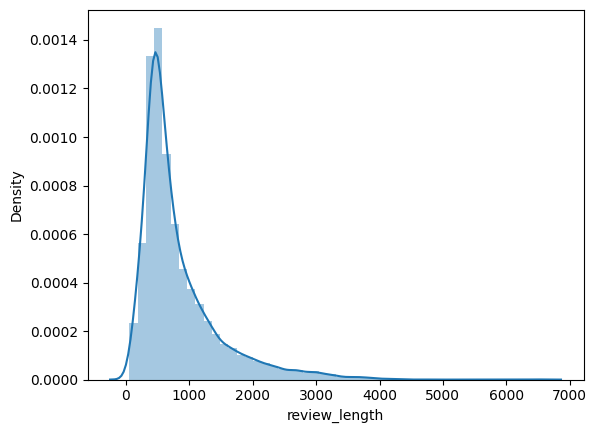

In [43]:
import seaborn as sns
sns.distplot(df['review_length'])

C:\Users\MP2NJ\AppData\Local\Temp\ipykernel_21156\593212863.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='positive']['review_length'])
C:\Users\MP2NJ\AppData\Local\Temp\ipykernel_21156\593212863.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='n

<Axes: xlabel='review_length', ylabel='Density'>

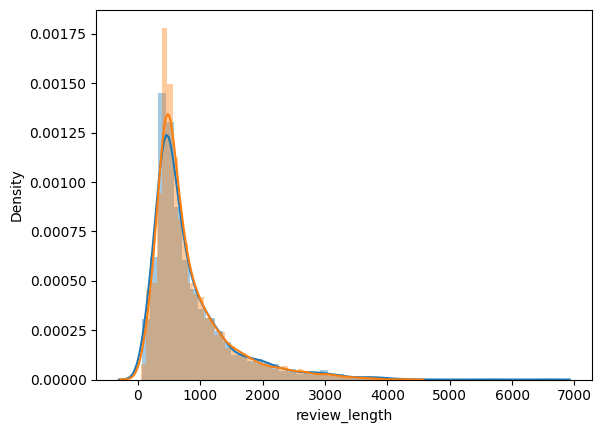

In [44]:
sns.distplot(df[df['sentiment']=='positive']['review_length'])
sns.distplot(df[df['sentiment']=='negative']['review_length'])

C:\Users\MP2NJ\AppData\Local\Temp\ipykernel_21156\271449163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']=='positive']['Tokenize_word_len'])
C:\Users\MP2NJ\AppData\Local\Temp\ipykernel_21156\271449163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment']

<Axes: xlabel='Tokenize_word_len', ylabel='Density'>

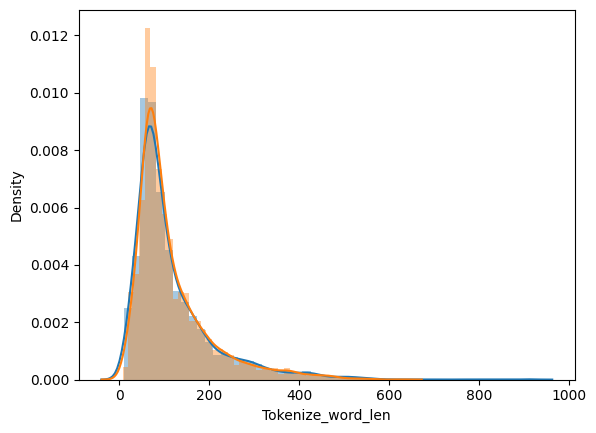

In [45]:
sns.distplot(df[df['sentiment']=='positive']['Tokenize_word_len'])
sns.distplot(df[df['sentiment']=='negative']['Tokenize_word_len'])

Common Unigram / bigram / trigram

In [46]:
from nltk import ngrams
pd.Series(ngrams(df['Tokenize_Word'].sum(),2)).value_counts()

(I, would)            492
(ever, seen)          459
(special, effects)    438
(I, seen)             429
(even, though)        372
                     ... 
(1992, hows)            1
(hows, horror)          1
(fit, really)           1
(really, claimed)       1
(hurt, yet)             1
Name: count, Length: 845149, dtype: int64

In [47]:
# pd.Series(ngrams(df['Tokenize_Word'].sum(),3)).value_counts()

Word Cloud

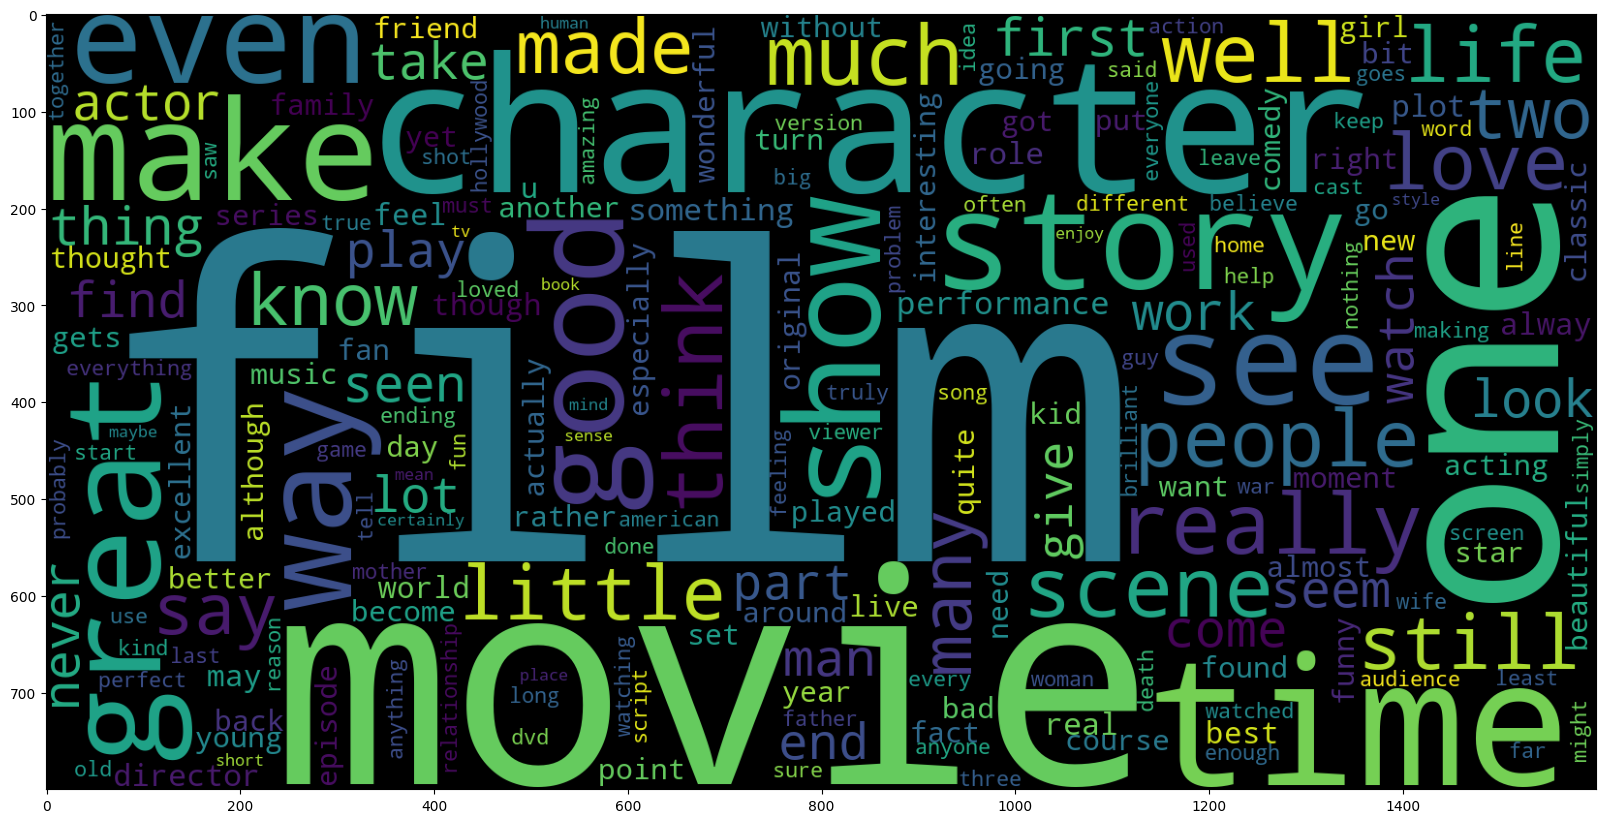

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
wc=WordCloud(width=1600 , height=800).generate(" ".join(df[df['sentiment']=='positive']['review']))
plt.imshow(wc)

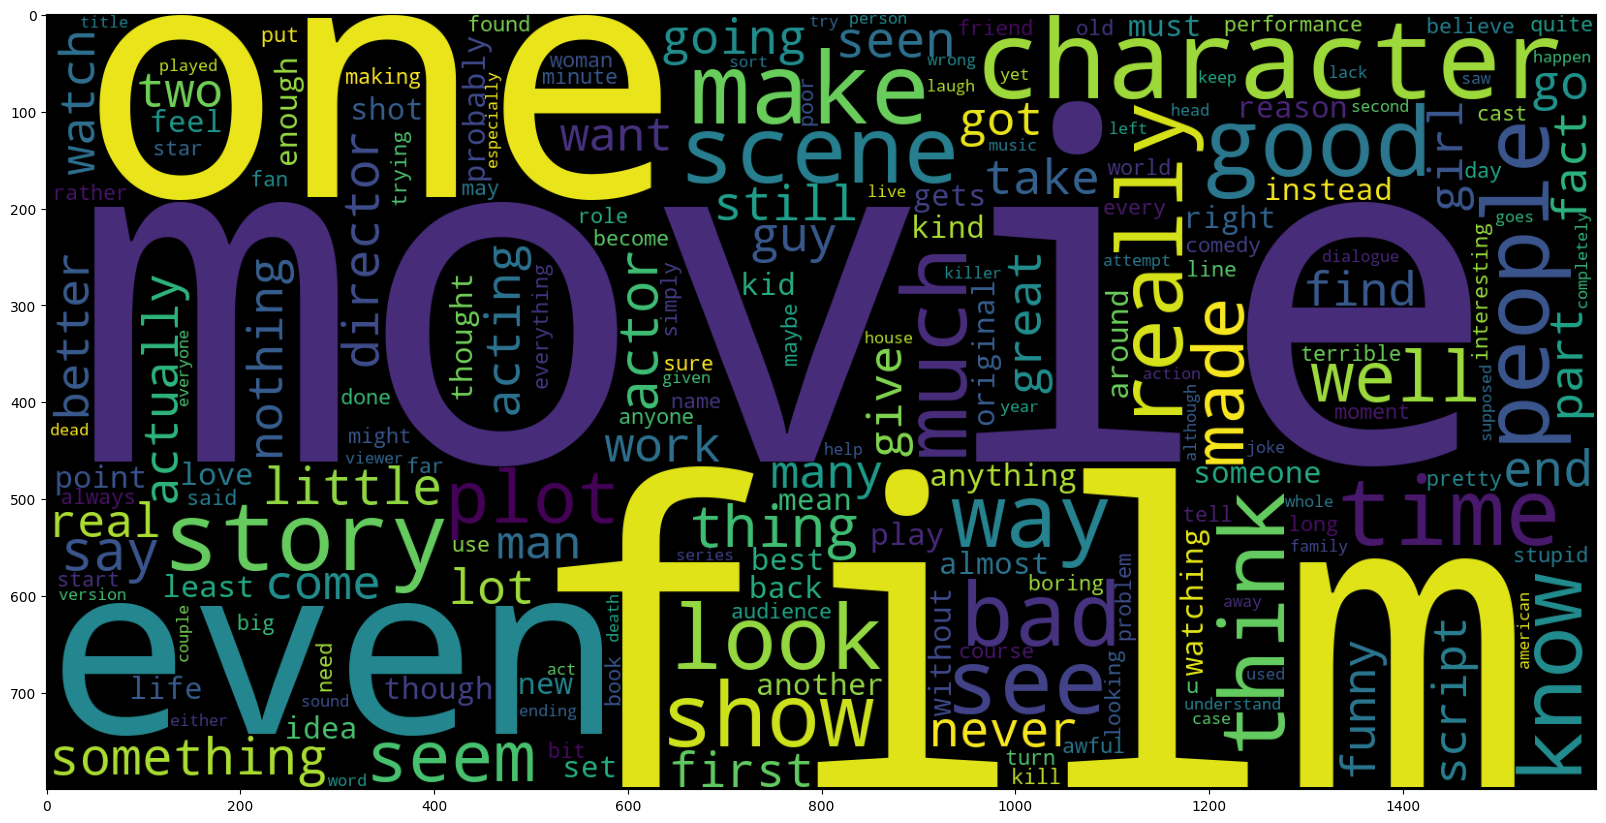

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
wc=WordCloud(width=1600 , height=800).generate(" ".join(df[df['sentiment']=='negative']['review']))
plt.imshow(wc)

# Vectorzation

Bag Of Words (BOW)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer(max_features=5000) # for 5000 columns
bag_of_words=count_vectorizer.fit_transform(df['review'])
bag_of_words=pd.DataFrame(bag_of_words.toarray(),columns=count_vectorizer.get_feature_names_out())

In [51]:
bag_of_words

,10,100,1000,1010,11,110,12,13,13th,14,...,york,you,young,younger,youth,youthful,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


using ngram in BOW

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer(max_features=5000,ngram_range=(1,3)) # ngram will results in uni,bi and trigram
bag_of_words=count_vectorizer.fit_transform(df['review'])
bag_of_words=pd.DataFrame(bag_of_words.toarray(),columns=count_vectorizer.get_feature_names_out())

In [53]:
bag_of_words

,10,10 10,10 minutes,10 years,100,1010,11,110,12,13,...,young girl,young man,young people,young woman,younger,youth,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PCA : converts higher dimension to lower dimension

In [54]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)  # 2-D 
pca_result=pca.fit_transform(bag_of_words.values)

In [55]:
pca_result

array([[-1.29426044, -0.48741477],
       [-2.20650797, -0.57107322],
       [-1.83965927, -0.4522137 ],
       ...,
       [ 1.02485364, -2.74966911],
       [-0.88744006,  0.24688549],
       [ 4.58527009,  2.68130304]])

<Axes: >

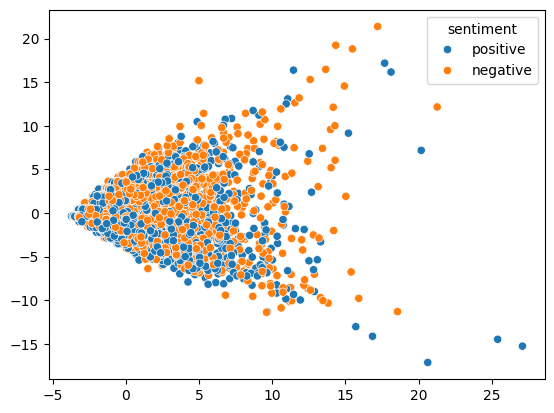

In [56]:
sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=df['sentiment'])